In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Ripple control statistices to modify the real operation

Ripple control is a technology that is used to manage the supply of electricity in residential hot water cylinders in New Zealand. This technology allows utility companies to remotely control the electricity supply to hot water cylinders, ensuring that electricity is used efficiently and cost-effectively.

One of the key benefits of ripple control is that it allows utility companies to manage the demand for electricity during peak periods. By limiting the amount of electricity that is supplied to hot water cylinders during these times, the utility company can help to prevent power outages and ensure that electricity is available to meet the needs of other customers.

Overall, ripple control is a useful technology that can help to manage the supply of electricity to residential hot water cylinders in New Zealand. By allowing utility companies to control the electricity supply, ripple control can help to prevent power outages, reduce electricity bills, and protect the environment.


A 2020 research paper by [EECA](https://www.eeca.govt.nz/assets/EECA-Resources/Research-papers-guides/Ripple-Control-of-Hot-Water-in-New-Zealand.pdf) reviews the current state and operation of the ripple control network.

Details of ripple control used for load management are detailled on the [Orion Network](https://online.oriongroup.co.nz/LoadManagement/Default.aspx?autorefresh=false)

In [48]:
def get_season(date):
  month = date.month
  if month  >= 3 and month <= 5:
    return "Autumn"
  elif month >= 6 and month <= 8:
    return "Winter"
  elif month >= 9 and month <= 11:
    return "Spring"
  else:
    return "Summer"

In [54]:
df = pd.read_excel('../data/orion_rc.xlsx', skiprows=11)
df = df.dropna(axis=1, how='all').iloc[:,:3]#.set_index('Date')
df.columns = ['Date', 'max_off', 'max_ave_off']
df = df.set_index('Date')
# convert h:m:s to seconds
df['max_off'] = pd.to_datetime(df['max_off'], format='%H:%M:%S')
df['max_ave_off'] = pd.to_datetime(df['max_ave_off'], format='%H:%M:%S')
df = df.assign(max_off = lambda x: x['max_off'].dt.hour*60 + x['max_off'].dt.minute + x['max_off'].dt.second/60,
          max_ave_off = lambda x: x['max_ave_off'].dt.hour*60 + x['max_ave_off'].dt.minute + x['max_ave_off'].dt.second/60,
          day = lambda x: x.index.dayofweek,
          month = lambda x: x.index.month,
          season = lambda x: x.index.map(get_season))

There is a large variation in frequency based on the season

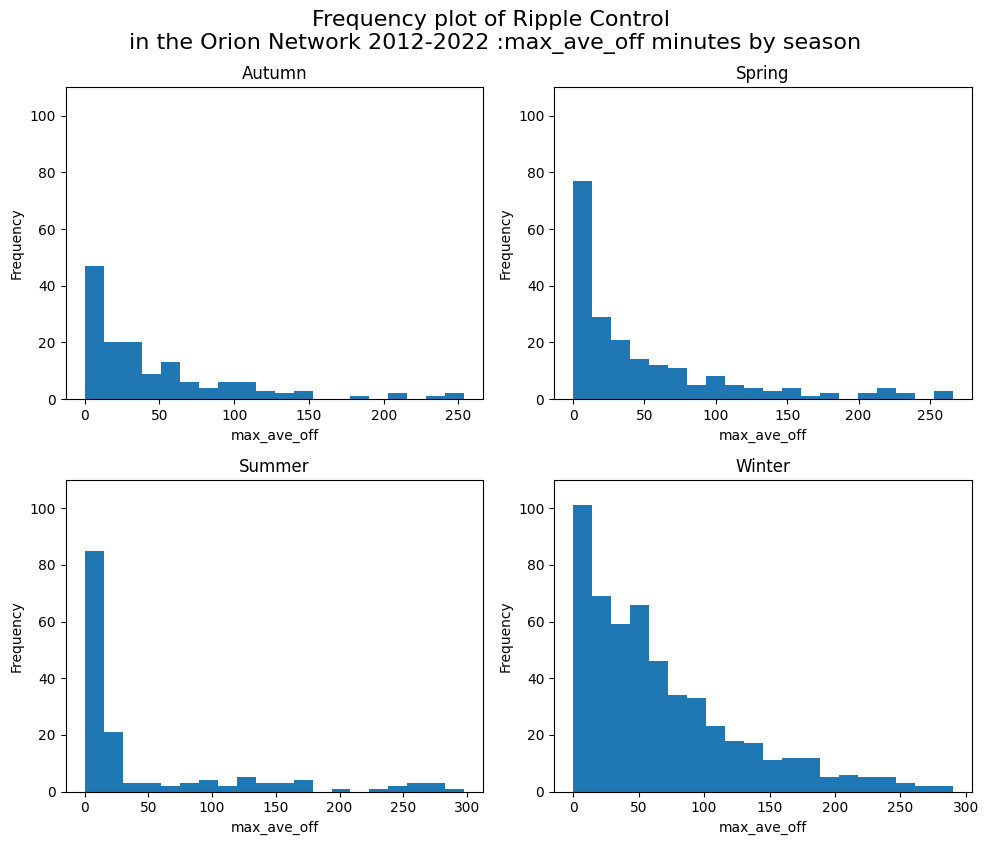

In [65]:
# do a frequency plot of the max_average_off grouped by season as 4 separate subplots (one for each season)
# rc.groupby('season')['max_ave_off'].plot(kind='hist', alpha=0.5, legend=True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Use the Pandas groupby() method to group the data by season
grouped_data = df.groupby('season')

# Loop through the seasons and create a frequency plot for each one
for i, (season, data) in enumerate(grouped_data):
  # Select the appropriate subplot
  if i == 0:
    ax_ = ax[0,0]
  elif i == 1:
    ax_ = ax[0,1]
  elif i == 2:
    ax_ = ax[1,0]
  else:
    ax_ = ax[1,1]

  # Create the frequency plot
  ax_.hist(data['max_ave_off'], bins=20)

  # Set the title and labels
  ax_.set_ylim(0, 110)
  ax_.set_title(season)
  ax_.set_xlabel('max_ave_off')
  ax_.set_ylabel('Frequency')

# Adjust the layout and show the plot
fig.tight_layout()
fig.suptitle('Frequency plot of Ripple Control \nin the Orion Network 2012-2022 :max_ave_off minutes by season', fontsize=16, y=1.05)
plt.show()

<AxesSubplot: xlabel='Date'>

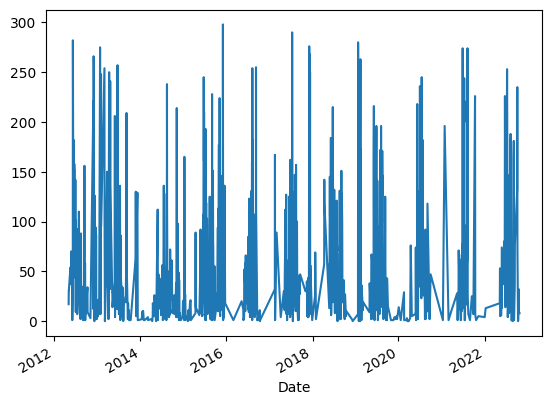

In [37]:
rc.max_ave_off.plot()

In [66]:
print(f'The period covered by the dataset is {(rc.index.max()-rc.index.min()).days} days')
print(f'There were {len(rc)} ripple control events in this period')
print(f'The average maximum outage duration was {rc.max_off.mean():.0f} mintues with a standard deviation of {rc.max_off.std():.0f} mintues')
print(f'The average maximum average outage duration was {rc.max_ave_off.mean():.0f} mintues with a standard deviation of {rc.max_ave_off.std():.0f} mintues')

The period covered by the dataset is 3829 days
There were 1030 ripple control events in this period
The average maximum outage duration was 86 mintues with a standard deviation of 74 mintues
The average maximum average outage duration was 58 mintues with a standard deviation of 62 mintues


<AxesSubplot: title={'center': 'Maximum outage duration (mintues)'}, ylabel='Frequency'>

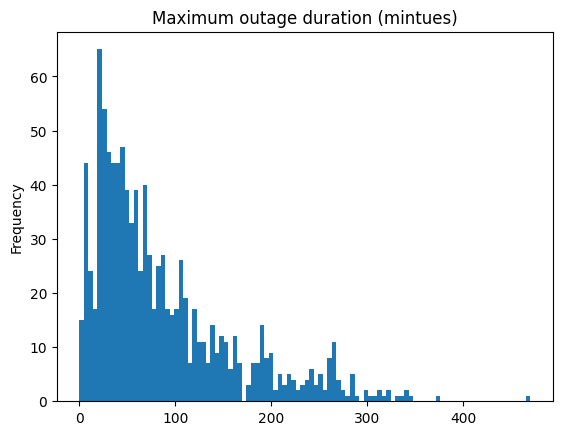

In [32]:
rc.max_off.plot(kind='hist', bins=100, title='Maximum outage duration (mintues)')

<AxesSubplot: title={'center': 'Maximum average off duration (mintues)'}, ylabel='Frequency'>

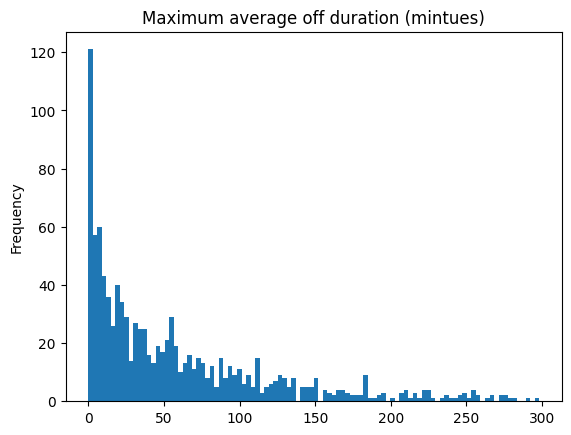

In [33]:
rc.max_ave_off.plot(kind='hist', bins=100, title='Maximum average off duration (mintues)')

TODO: Provide statistics to feed into the power data to override the HWC thermostat to simulate loss of power due to ripple control